<a href="https://colab.research.google.com/github/Mushfiq-Azam/Learn-ML-with-Mushfiq/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

In [3]:
# Define column names based on Boston Housing dataset description
columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
           'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [6]:
# Load the dataset from CSV string

data = pd.read_csv("housing.csv", names=columns, delim_whitespace=True)

In [7]:
# Data Exploration & Preprocessing
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


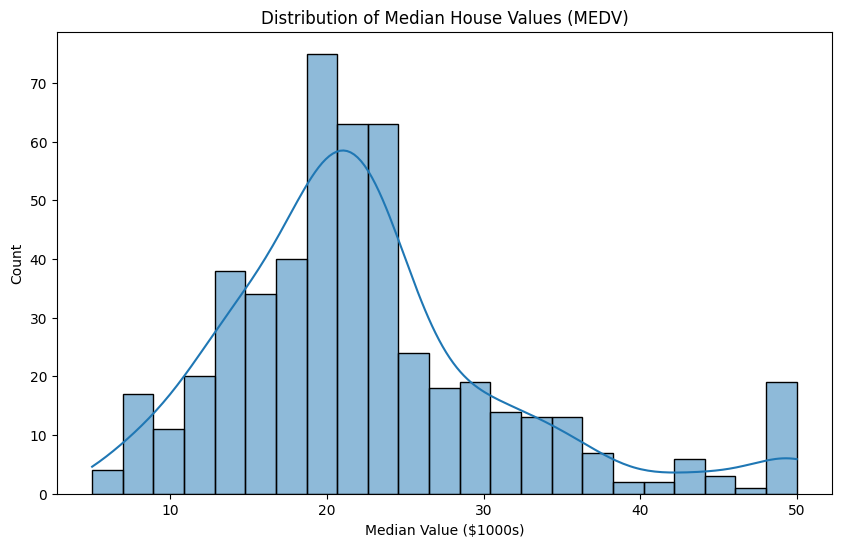

In [8]:
# Visualize distribution of target variable (MEDV)
plt.figure(figsize=(10, 6))
sns.histplot(data['MEDV'], kde=True)
plt.title('Distribution of Median House Values (MEDV)')
plt.xlabel('Median Value ($1000s)')
plt.ylabel('Count')
plt.show()

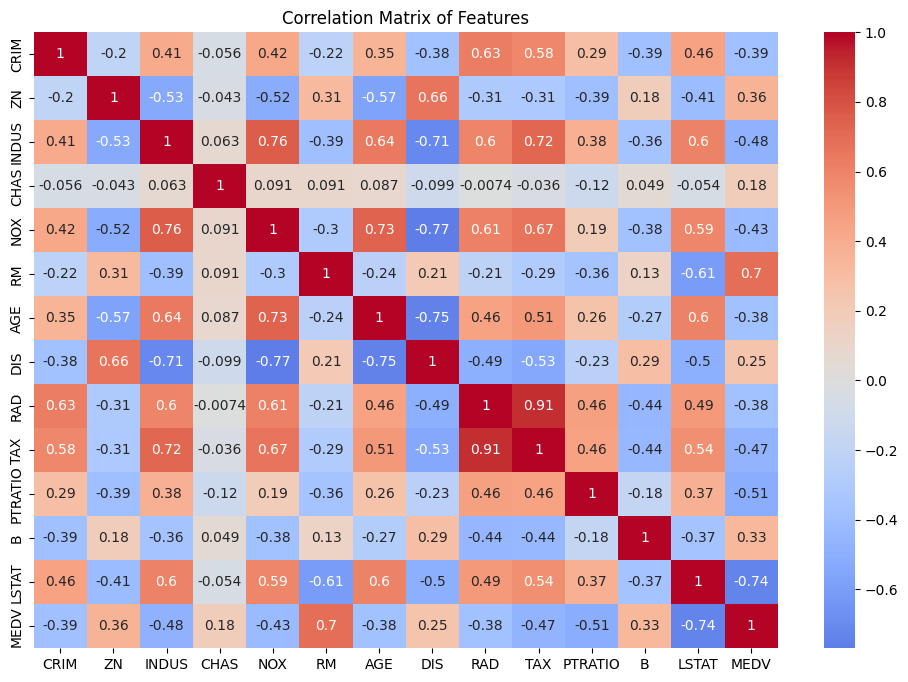

In [9]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.show()

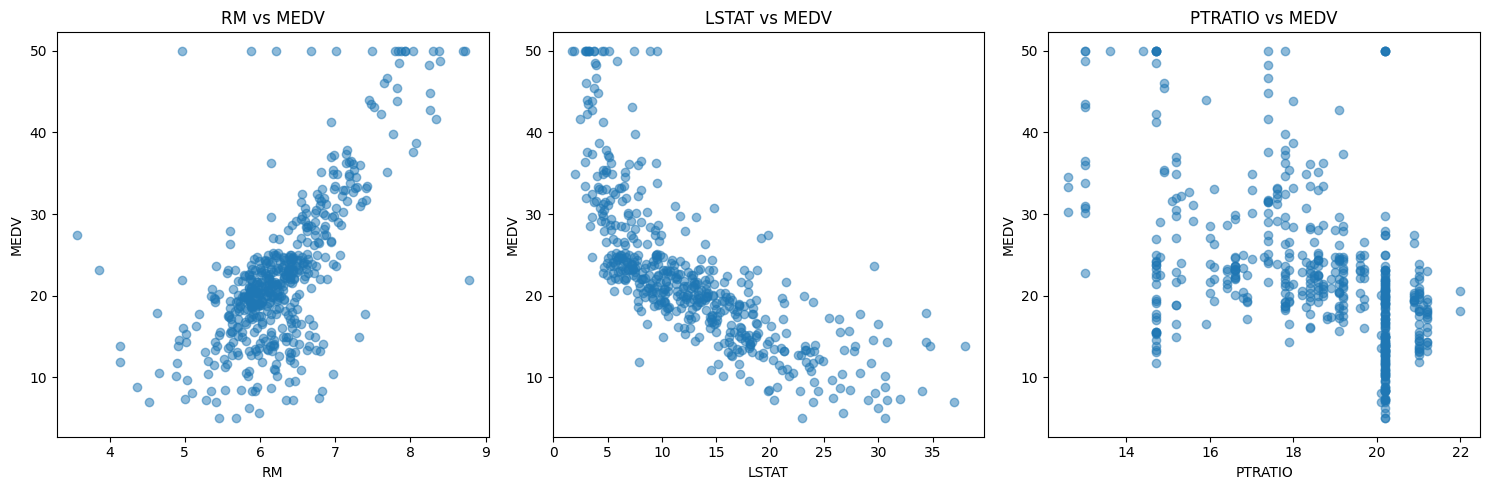

In [10]:
# Scatter plots of key features vs target
key_features = ['RM', 'LSTAT', 'PTRATIO']
plt.figure(figsize=(15, 5))
for i, feature in enumerate(key_features, 1):
    plt.subplot(1, 3, i)
    plt.scatter(data[feature], data['MEDV'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('MEDV')
    plt.title(f'{feature} vs MEDV')
plt.tight_layout()
plt.show()

In [11]:
# Data Splitting
X = data.drop('MEDV', axis=1)
y = data['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
# Model Training - Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)


LinearRegression()

In [20]:
# Model Evaluation
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Calculate Adjusted R-squared
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

    print(f"\n{model_name} Performance Metrics:")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared: {r2:.2f}")
    print(f"Adjusted R-squared: {adj_r2:.2f}")

    return y_pred

In [21]:
# Evaluate Linear Regression
lr_pred = evaluate_model(lr_model, X_test_scaled, y_test, "Linear Regression")



Linear Regression Performance Metrics:
Mean Absolute Error (MAE): 3.16
Mean Squared Error (MSE): 21.52
Root Mean Squared Error (RMSE): 4.64
R-squared: 0.71
Adjusted R-squared: 0.68


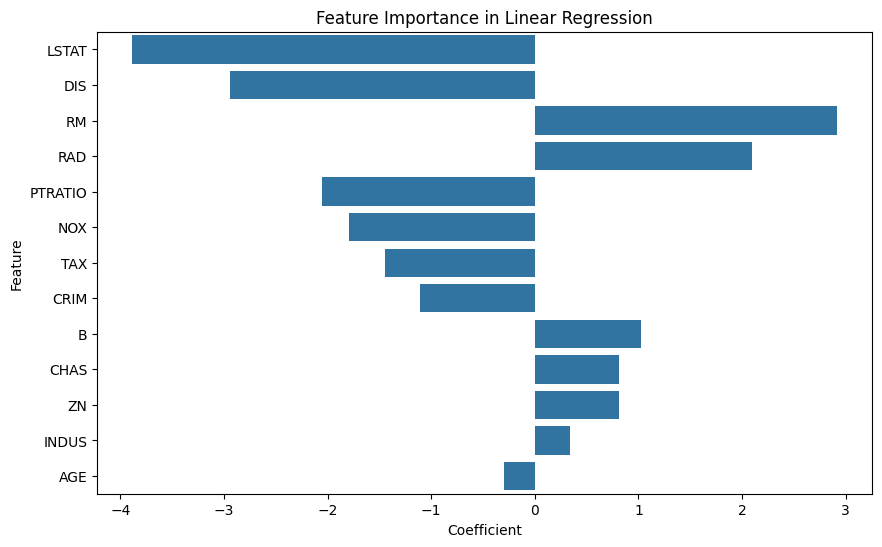

In [22]:
# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': columns[:-1],
    'Coefficient': lr_model.coef_
})
feature_importance = feature_importance.sort_values('Coefficient', key=abs, ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance in Linear Regression')
plt.show()

In [23]:
# Improvement: Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

In [24]:
# Train polynomial regression
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [25]:
# Evaluate Polynomial Regression
poly_pred = evaluate_model(poly_model, X_test_poly, y_test, "Polynomial Regression")


Polynomial Regression Performance Metrics:
Mean Absolute Error (MAE): 3.06
Mean Squared Error (MSE): 25.26
Root Mean Squared Error (RMSE): 5.03
R-squared: 0.66
Adjusted R-squared: -0.09


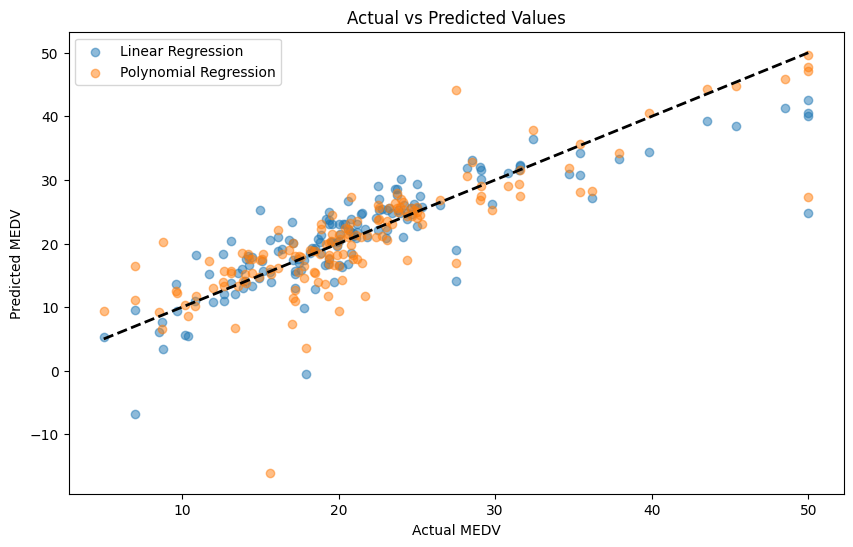

In [26]:
# Visualize predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_pred, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, poly_pred, alpha=0.5, label='Polynomial Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual MEDV')
plt.ylabel('Predicted MEDV')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.show()